In [1]:
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt

In [5]:
folder_path = '../data'
file1 = 'extract_rate_all.rwo'
path2file = os.path.join(folder_path, file1)


In [3]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

In [38]:
def readcmg_ts_rwo_to_dict(path2file, line_dist):
    """
    Input
    path2file: path to the rwo file. e.g. '../data/Shell/testoutput.rwo'
    line_dist: number of lines from the line of 'FILE: xxx.sr3' to the first line of the numbers
    E.g.:   Shell case, line_dist = 6
            Case Gasification model CASE 1.sr3, line_dist = 9
    Output:
    cache:  dict format.
            Keys record the file names if multiple files extract results all together.
            Values: list of lists. Length is the number of lines of data. For each sub-list, length is the number of columns in rwo files.

    """
    with open(path2file) as file:
        lines = file.readlines()

    cache = {}
    i = 0

    while i < len(lines):
        # try:
        if lines[i].split() and lines[i].split()[0] == 'FILE:':
            # caseid = lines[i].split()[-1][0:-4]
            caseid = ' '.join(lines[i].split()[1:-1]+[''])+lines[i].split()[-1][0:-4]
            if caseid not in cache:
                cache[caseid] = []
            dline = line_dist
            temp_list = []
            while (i+dline<len(lines)) and lines[i+dline].split() and isfloat(lines[i+dline].split()[0]):
                temp_list.append([float(lines[i+dline].split()[0]), float(lines[i+dline].split()[1])])
                dline += 1
            cache[caseid] += temp_list
            i += dline
        else:
            i += 1

    return cache

def save_dict_to_npy(cache, save_folder):
    for case in cache:
        data = np.array(cache[case])
        np.save(file=os.path.join(save_folder, f'{case}.npy'), arr=data)

    

In [33]:
with open(path2file) as file:
    lines = file.readlines()
    

cache = {}
i = 0

while i < len(lines):
    # try:
    if lines[i].split() and lines[i].split()[0] == 'FILE:':
        # caseid = lines[i].split()[-1][0:-4]
        caseid = ' '.join(lines[i].split()[1:-1]+[''])+lines[i].split()[-1][0:-4]
        if caseid not in cache:
            cache[caseid] = []
        dline = 6
        # dline = 9
        temp_list = []
        while (i+dline<len(lines)) and lines[i+dline].split() and isfloat(lines[i+dline].split()[0]):
            temp_list.append([float(lines[i+dline].split()[0]), float(lines[i+dline].split()[1])])
            dline += 1
        cache[caseid] += temp_list
        i += dline
    else:
        i += 1
    # except:
    #     i += 1

        

In [3]:
time_uniform = np.concatenate((np.linspace(0,10984, 1374), np.linspace(10984+8,36524, 120)), axis=0)

dfrst = pd.DataFrame({})
dfrst['Time, days'] = time_uniform
for well in cache:
    xp = np.array(cache[well])[:,0]
    fp = np.array(cache[well])[:,1]
    dfrst[well] = np.interp(time_uniform, xp, fp)

In [181]:
dfrst.to_csv('Injection_rates_all.csv', index=False)

In [4]:
dfrst = pd.read_csv('../data/Shell/Injection_rates_all.csv')



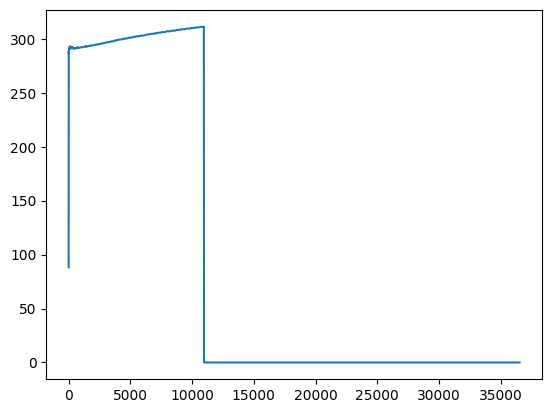

In [5]:
plt.plot(dfrst['Time, days'], dfrst['case20'])
plt.show()

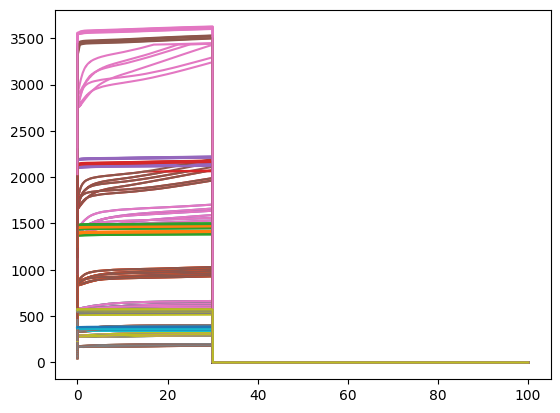

In [13]:

time_uniform = dfrst['Time, days'].values/365
for cid in dfrst.columns[1:]:
    rate = dfrst[cid].values
    plt.plot(time_uniform, rate)
plt.show()